# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [43]:
sinasc = pd.read_csv(r'SINASC_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [44]:
sinasc_1 = sinasc[[
    'QTDPARTNOR', 'QTDGESTANT', 'munResLat', 'CONSULTAS', 'munResAlt',
    'munResArea'
]].copy()

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [45]:
lat = pd.cut(sinasc['munResLat'], [-13.3, -10.5, -8.8])

In [46]:
sinasc_1.pivot_table(
    values=['QTDPARTNOR'],
    index=['munResLat', lat],
    columns=['CONSULTAS'],
    aggfunc={np.sum, np.min, np.mean, np.max, np.median, np.std, np.var},
    fill_value=0)

C:\Users\rafar\AppData\Local\Temp\ipykernel_23672\2847239849.py:1: FutureWarning: The provided callable <function min at 0x000001FD089E53A0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  sinasc_1.pivot_table(
C:\Users\rafar\AppData\Local\Temp\ipykernel_23672\2847239849.py:1: FutureWarning: The provided callable <function max at 0x000001FD089E5260> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  sinasc_1.pivot_table(
C:\Users\rafar\AppData\Local\Temp\ipykernel_23672\2847239849.py:1: FutureWarning: The provided callable <function sum at 0x000001FD089E4B80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sinasc_1.pivot_ta

QTDPARTNOR                                   \
                                max                       mean         
CONSULTAS                         1    2    3    4    9      1     2   
munResLat munResLat                                                    
-13.49976 (-13.3, -10.5]        0.0  0.0  0.0  0.0  0.0  0.000  0.00   
          (-10.5, -8.8]         0.0  0.0  0.0  0.0  0.0  0.000  0.00   
-13.47656 (-13.3, -10.5]        0.0  0.0  0.0  0.0  0.0  0.000  0.00   
          (-10.5, -8.8]         0.0  0.0  0.0  0.0  0.0  0.000  0.00   
-13.19503 (-13.3, -10.5]        0.0  1.0  7.0  8.0  0.0  0.000  0.75   
...                             ...  ...  ...  ...  ...    ...   ...   
-9.19187  (-10.5, -8.8]         1.0  2.0  4.0  6.0  0.0  0.625  2.00   
-8.78502  (-13.3, -10.5]        0.0  0.0  0.0  0.0  0.0  0.000  0.00   
          (-10.5, -8.8]         0.0  0.0  0.0  0.0  0.0  0.000  0.00   
-8.76889  (-13.3, -10.5]        0.0  0.0  0.0  0.0  0.0  0.000  0.00   
          (-10.5, -8.8]         0.0  0.0  0.0  0.0  0.0  0.000  0.00   

                                                   ...                        \
                                                   ...  sum                    
CONSULTAS                        3         4    9  ...    1    2     3     4   
munResLat munResLat                                ...                         
-13.49976 (-13.3, -10.5]  0.000000  0.000000  0.0  ...  0.0  0.0   0.0   0.0   
          (-10.5, -8.8]   0.000000  0.000000  0.0  ...  0.0  0.0   0.0   0.0   
-13.47656 (-13.3, -10.5]  0.000000  0.000000  0.0  ...  0.0  0.0   0.0   0.0   
          (-10.5, -8.8]   0.000000  0.000000  0.0  ...  0.0  0.0   0.0   0.0   
-13.19503 (-13.3, -10.5]  0.341463  0.308108  0.0  ...  0.0  3.0  14.0  57.0   
...                            ...       ...  ...  ...  ...  ...   ...   ...   
-9.19187  (-10.5, -8.8]   1.000000  1.048193  0.0  ...  5.0  2.0  10.0  87.0   
-8.78502  (-13.3, -10.5]  0.000000  0.000000  0.0  ...  0.0  0.0   0.0   0.0   
          (-10.5, -8.8]   0.000000  0.000000  0.0  ...  0.0  0.0   0.0   0.0   
-8.76889  (-13.3, -10.5]  0.000000  0.000000  0.0  ...  0.0  0.0   0.0   0.0   
          (-10.5, -8.8]   0.000000  0.000000  0.0  ...  0.0  0.0   0.0   0.0   

                                                                        
                                    var                                 
CONSULTAS                   9         1     2         3         4    9  
munResLat munResLat                                                     
-13.49976 (-13.3, -10.5]  0.0  0.000000  0.00  0.000000  0.000000  0.0  
          (-10.5, -8.8]   0.0  0.000000  0.00  0.000000  0.000000  0.0  
-13.47656 (-13.3, -10.5]  0.0  0.000000  0.00  0.000000  0.000000  0.0  
          (-10.5, -8.8]   0.0  0.000000  0.00  0.000000  0.000000  0.0  
-13.19503 (-13.3, -10.5]  0.0  0.000000  0.25  1.380488  0.681727  0.0  
...                       ...       ...   ...       ...       ...  ...  
-9.19187  (-10.5, -8.8]   0.0  0.267857  0.00  2.222222  2.363503  0.0  
-8.78502  (-13.3, -10.5]  0.0  0.000000  0.00  0.000000  0.000000  0.0  
          (-10.5, -8.8]   0.0  0.000000  0.00  0.000000  0.000000  0.0  
-8.76889  (-13.3, -10.5]  0.0  0.000000  0.00  0.000000  0.000000  0.0  
          (-10.5, -8.8]   0.0  0.000000  0.00  0.000000  0.000000  0.0  

[104 rows x 35 columns]

In [47]:
sinasc_1.pivot_table(
    values=['QTDGESTANT'],
    index=['munResLat', lat],
    columns=['CONSULTAS'],
    aggfunc={np.sum, np.min, np.mean, np.max, np.median, np.std, np.var},
    fill_value=0)

C:\Users\rafar\AppData\Local\Temp\ipykernel_23672\4007103382.py:1: FutureWarning: The provided callable <function min at 0x000001FD089E53A0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  sinasc_1.pivot_table(
C:\Users\rafar\AppData\Local\Temp\ipykernel_23672\4007103382.py:1: FutureWarning: The provided callable <function max at 0x000001FD089E5260> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  sinasc_1.pivot_table(
C:\Users\rafar\AppData\Local\Temp\ipykernel_23672\4007103382.py:1: FutureWarning: The provided callable <function sum at 0x000001FD089E4B80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sinasc_1.pivot_ta

QTDGESTANT                                      \
                                max                           mean        
CONSULTAS                         1    2    3     4    9         1    2   
munResLat munResLat                                                       
-13.49976 (-13.3, -10.5]        0.0  0.0  0.0   0.0  0.0  0.000000  0.0   
          (-10.5, -8.8]         0.0  0.0  0.0   0.0  0.0  0.000000  0.0   
-13.47656 (-13.3, -10.5]        0.0  0.0  0.0   0.0  0.0  0.000000  0.0   
          (-10.5, -8.8]         0.0  0.0  0.0   0.0  0.0  0.000000  0.0   
-13.19503 (-13.3, -10.5]        1.0  3.0  7.0   8.0  0.0  0.333333  2.5   
...                             ...  ...  ...   ...  ...       ...  ...   
-9.19187  (-10.5, -8.8]         3.0  2.0  4.0  52.0  0.0  1.250000  2.0   
-8.78502  (-13.3, -10.5]        0.0  0.0  0.0   0.0  0.0  0.000000  0.0   
          (-10.5, -8.8]         0.0  0.0  0.0   0.0  0.0  0.000000  0.0   
-8.76889  (-13.3, -10.5]        0.0  0.0  0.0   0.0  0.0  0.000000  0.0   
          (-10.5, -8.8]         0.0  0.0  0.0   0.0  0.0  0.000000  0.0   

                                                   ...                    \
                                                   ...   sum               
CONSULTAS                        3         4    9  ...     1     2     3   
munResLat munResLat                                ...                     
-13.49976 (-13.3, -10.5]  0.000000  0.000000  0.0  ...   0.0   0.0   0.0   
          (-10.5, -8.8]   0.000000  0.000000  0.0  ...   0.0   0.0   0.0   
-13.47656 (-13.3, -10.5]  0.000000  0.000000  0.0  ...   0.0   0.0   0.0   
          (-10.5, -8.8]   0.000000  0.000000  0.0  ...   0.0   0.0   0.0   
-13.19503 (-13.3, -10.5]  1.512195  1.189189  0.0  ...   1.0  10.0  62.0   
...                            ...       ...  ...  ...   ...   ...   ...   
-9.19187  (-10.5, -8.8]   2.200000  2.256098  0.0  ...  10.0   2.0  22.0   
-8.78502  (-13.3, -10.5]  0.000000  0.000000  0.0  ...   0.0   0.0   0.0   
          (-10.5, -8.8]   0.000000  0.000000  0.0  ...   0.0   0.0   0.0   
-8.76889  (-13.3, -10.5]  0.000000  0.000000  0.0  ...   0.0   0.0   0.0   
          (-10.5, -8.8]   0.000000  0.000000  0.0  ...   0.0   0.0   0.0   

                                                                               \
                                           var                                  
CONSULTAS                     4    9         1         2         3          4   
munResLat munResLat                                                             
-13.49976 (-13.3, -10.5]    0.0  0.0  0.000000  0.000000  0.000000   0.000000   
          (-10.5, -8.8]     0.0  0.0  0.000000  0.000000  0.000000   0.000000   
-13.47656 (-13.3, -10.5]    0.0  0.0  0.000000  0.000000  0.000000   0.000000   
          (-10.5, -8.8]     0.0  0.0  0.000000  0.000000  0.000000   0.000000   
-13.19503 (-13.3, -10.5]  220.0  0.0  0.333333  0.333333  1.956098   1.328143   
...                         ...  ...       ...       ...       ...        ...   
-9.19187  (-10.5, -8.8]   185.0  0.0  1.071429  0.000000  2.177778  34.044715   
-8.78502  (-13.3, -10.5]    0.0  0.0  0.000000  0.000000  0.000000   0.000000   
          (-10.5, -8.8]     0.0  0.0  0.000000  0.000000  0.000000   0.000000   
-8.76889  (-13.3, -10.5]    0.0  0.0  0.000000  0.000000  0.000000   0.000000   
          (-10.5, -8.8]     0.0  0.0  0.000000  0.000000  0.000000   0.000000   

                               
                               
CONSULTAS                   9  
munResLat munResLat            
-13.49976 (-13.3, -10.5]  0.0  
          (-10.5, -8.8]   0.0  
-13.47656 (-13.3, -10.5]  0.0  
          (-10.5, -8.8]   0.0  
-13.19503 (-13.3, -10.5]  0.0  
...                       ...  
-9.19187  (-10.5, -8.8]   0.0  
-8.78502  (-13.3, -10.5]  0.0  
          (-10.5, -8.8]   0.0  
-8.76889  (-13.3, -10.5]  0.0  
          (-10.5, -8.8]   0.0  

[104 rows x 35 columns]

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [48]:
area = pd.cut(sinasc['munResArea'], [0, 3000, 999999])

In [49]:
sinasc_1.pivot_table(
    values=['QTDPARTNOR'],
    index=['munResArea', area],
    columns=['CONSULTAS'],
    aggfunc={np.sum, np.min, np.mean, np.max, np.median, np.std, np.var},
    fill_value=0)

C:\Users\rafar\AppData\Local\Temp\ipykernel_23672\2970559411.py:1: FutureWarning: The provided callable <function min at 0x000001FD089E53A0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  sinasc_1.pivot_table(
C:\Users\rafar\AppData\Local\Temp\ipykernel_23672\2970559411.py:1: FutureWarning: The provided callable <function max at 0x000001FD089E5260> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  sinasc_1.pivot_table(
C:\Users\rafar\AppData\Local\Temp\ipykernel_23672\2970559411.py:1: FutureWarning: The provided callable <function sum at 0x000001FD089E4B80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sinasc_1.pivot_ta

QTDPARTNOR                                   \
                                 max                             mean   
CONSULTAS                          1     2     3     4    9         1   
munResArea munResArea                                                   
459.978    (0, 3000]             0.0   6.0   2.0   2.0  0.0  0.000000   
           (3000, 999999]        0.0   0.0   0.0   0.0  0.0  0.000000   
541.647    (0, 3000]             0.0   0.0   5.0   2.0  0.0  0.000000   
           (3000, 999999]        0.0   0.0   0.0   0.0  0.0  0.000000   
605.692    (0, 3000]             0.0   0.0   2.0   2.0  0.0  0.000000   
...                              ...   ...   ...   ...  ...       ...   
11518.915  (3000, 999999]        3.0   6.0   4.0   9.0  0.0  0.428571   
24855.724  (0, 3000]             0.0   0.0   0.0   0.0  0.0  0.000000   
           (3000, 999999]       10.0  10.0   9.0  10.0  0.0  1.255319   
34096.394  (0, 3000]             0.0   0.0   0.0   0.0  0.0  0.000000   
           (3000, 999999]       12.0   9.0  40.0  14.0  6.0  0.817857   

                                                                   ...         \
                                                                   ...    sum   
CONSULTAS                         2         3         4         9  ...      1   
munResArea munResArea                                              ...          
459.978    (0, 3000]       6.000000  0.666667  0.101695  0.000000  ...    0.0   
           (3000, 999999]  0.000000  0.000000  0.000000  0.000000  ...    0.0   
541.647    (0, 3000]       0.000000  0.700000  0.190476  0.000000  ...    0.0   
           (3000, 999999]  0.000000  0.000000  0.000000  0.000000  ...    0.0   
605.692    (0, 3000]       0.000000  0.500000  0.361111  0.000000  ...    0.0   
...                             ...       ...       ...       ...  ...    ...   
11518.915  (3000, 999999]  0.673077  0.397490  0.302983  0.000000  ...    6.0   
24855.724  (0, 3000]       0.000000  0.000000  0.000000  0.000000  ...    0.0   
           (3000, 999999]  1.796875  1.303333  0.914384  0.000000  ...   59.0   
34096.394  (0, 3000]       0.000000  0.000000  0.000000  0.000000  ...    0.0   
           (3000, 999999]  1.082051  0.897280  0.685948  1.032258  ...  458.0   

                                                                            \
                                                             var             
CONSULTAS                      2       3       4     9         1         2   
munResArea munResArea                                                        
459.978    (0, 3000]         6.0     2.0     6.0   0.0  0.000000  0.000000   
           (3000, 999999]    0.0     0.0     0.0   0.0  0.000000  0.000000   
541.647    (0, 3000]         0.0     7.0     8.0   0.0  0.000000  0.000000   
           (3000, 999999]    0.0     0.0     0.0   0.0  0.000000  0.000000   
605.692    (0, 3000]         0.0     3.0    13.0   0.0  0.000000  0.000000   
...                          ...     ...     ...   ...       ...       ...   
11518.915  (3000, 999999]   35.0    95.0   386.0   0.0  0.879121  1.557692   
24855.724  (0, 3000]         0.0     0.0     0.0   0.0  0.000000  0.000000   
           (3000, 999999]  230.0   391.0   267.0   0.0  4.542091  4.131644   
34096.394  (0, 3000]         0.0     0.0     0.0   0.0  0.000000  0.000000   
           (3000, 999999]  633.0  1913.0  2680.0  32.0  2.056210  2.147366   

                                                         
                                                         
CONSULTAS                         3         4         9  
munResArea munResArea                                    
459.978    (0, 3000]       1.333333  0.127411  0.000000  
           (3000, 999999]  0.000000  0.000000  0.000000  
541.647    (0, 3000]       2.677778  0.206736  0.000000  
           (3000, 999999]  0.000000  0.000000  0.000000  
605.692    (0, 3000]       0.700000  0.351587  0.000000  
...                  

In [50]:
sinasc_1.pivot_table(
    values=['QTDGESTANT'],
    index=['munResArea', area],
    columns=['CONSULTAS'],
    aggfunc={np.sum, np.min, np.mean, np.max, np.median, np.std, np.var},
    fill_value=0)

C:\Users\rafar\AppData\Local\Temp\ipykernel_23672\3077311769.py:1: FutureWarning: The provided callable <function min at 0x000001FD089E53A0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  sinasc_1.pivot_table(
C:\Users\rafar\AppData\Local\Temp\ipykernel_23672\3077311769.py:1: FutureWarning: The provided callable <function max at 0x000001FD089E5260> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  sinasc_1.pivot_table(
C:\Users\rafar\AppData\Local\Temp\ipykernel_23672\3077311769.py:1: FutureWarning: The provided callable <function sum at 0x000001FD089E4B80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sinasc_1.pivot_ta

QTDGESTANT                                   \
                                 max                             mean   
CONSULTAS                          1     2     3     4    9         1   
munResArea munResArea                                                   
459.978    (0, 3000]             2.0   6.0   2.0   4.0  0.0  2.000000   
           (3000, 999999]        0.0   0.0   0.0   0.0  0.0  0.000000   
541.647    (0, 3000]             1.0   0.0   7.0   2.0  0.0  1.000000   
           (3000, 999999]        0.0   0.0   0.0   0.0  0.0  0.000000   
605.692    (0, 3000]             0.0   0.0   4.0   3.0  0.0  0.000000   
...                              ...   ...   ...   ...  ...       ...   
11518.915  (3000, 999999]        3.0   6.0   5.0   9.0  2.0  1.071429   
24855.724  (0, 3000]             0.0   0.0   0.0   0.0  0.0  0.000000   
           (3000, 999999]       10.0  11.0   9.0  10.0  3.0  2.145833   
34096.394  (0, 3000]             0.0   0.0   0.0   0.0  0.0  0.000000   
           (3000, 999999]       12.0  14.0  13.0  12.0  7.0  1.529310   

                                                                   ...         \
                                                                   ...    sum   
CONSULTAS                         2         3         4         9  ...      1   
munResArea munResArea                                              ...          
459.978    (0, 3000]       6.000000  1.666667  0.898305  0.000000  ...    2.0   
           (3000, 999999]  0.000000  0.000000  0.000000  0.000000  ...    0.0   
541.647    (0, 3000]       0.000000  1.700000  0.619048  0.000000  ...    1.0   
           (3000, 999999]  0.000000  0.000000  0.000000  0.000000  ...    0.0   
605.692    (0, 3000]       0.000000  1.500000  1.277778  0.000000  ...    0.0   
...                             ...       ...       ...       ...  ...    ...   
11518.915  (3000, 999999]  1.615385  1.255230  1.106750  0.666667  ...   15.0   
24855.724  (0, 3000]       0.000000  0.000000  0.000000  0.000000  ...    0.0   
           (3000, 999999]  2.335938  1.897351  1.520548  3.000000  ...  103.0   
34096.394  (0, 3000]       0.000000  0.000000  0.000000  0.000000  ...    0.0   
           (3000, 999999]  1.748760  1.509607  1.349430  1.451613  ...  887.0   

                                                                             \
                                                              var             
CONSULTAS                       2       3       4     9         1         2   
munResArea munResArea                                                         
459.978    (0, 3000]          6.0     5.0    53.0   0.0  0.000000  0.000000   
           (3000, 999999]     0.0     0.0     0.0   0.0  0.000000  0.000000   
541.647    (0, 3000]          0.0    17.0    26.0   0.0  0.000000  0.000000   
           (3000, 999999]     0.0     0.0     0.0   0.0  0.000000  0.000000   
605.692    (0, 3000]          0.0     9.0    46.0   0.0  0.000000  0.000000   
...                           ...     ...     ...   ...       ...       ...   
11518.915  (3000, 999999]    84.0   300.0  1410.0   4.0  0.994505  2.006033   
24855.724  (0, 3000]          0.0     0.0     0.0   0.0  0.000000  0.000000   
           (3000, 999999]   299.0   573.0   444.0   3.0  5.191046  4.508305   
34096.394  (0, 3000]          0.0     0.0     0.0   0.0  0.000000  0.000000   
           (3000, 999999]  1058.0  3300.0  5449.0  45.0  2.753889  2.940085   

                                                         
                                                         
CONSULTAS                         3         4         9  
munResArea munResArea                                    
459.978    (0, 3000]       0.333333  0.954997  0.000000  
           (3000, 999999]  0.000000  0.000000  0.000000  
541.647    (0, 3000]       4.455556  0.583043  0.000000  
           (3000, 999999]  0.000000  0.000000  0.000000  
605.692    (0, 3000]       2.700000  0.720635  0.000000  
...   

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [51]:
alti = pd.qcut(sinasc['munResAlt'], 2)

In [52]:
sinasc_1.pivot_table(
    values=['QTDPARTNOR'],
    index=['munResAlt', alti],
    columns=['CONSULTAS'],
    aggfunc={np.sum, np.min, np.mean, np.max, np.median, np.std, np.var},
    fill_value=0)

C:\Users\rafar\AppData\Local\Temp\ipykernel_23672\133635416.py:1: FutureWarning: The provided callable <function min at 0x000001FD089E53A0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  sinasc_1.pivot_table(
C:\Users\rafar\AppData\Local\Temp\ipykernel_23672\133635416.py:1: FutureWarning: The provided callable <function max at 0x000001FD089E5260> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  sinasc_1.pivot_table(
C:\Users\rafar\AppData\Local\Temp\ipykernel_23672\133635416.py:1: FutureWarning: The provided callable <function sum at 0x000001FD089E4B80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sinasc_1.pivot_table

QTDPARTNOR                                  \
                                 max                            mean   
CONSULTAS                          1    2     3     4    9         1   
munResAlt munResAlt                                                    
85.0      (84.999, 153.0]        7.0  6.0  10.0   7.0  2.0  1.958333   
          (153.0, 595.0]         0.0  0.0   0.0   0.0  0.0  0.000000   
87.0      (84.999, 153.0]       12.0  9.0  40.0  14.0  6.0  0.817857   
          (153.0, 595.0]         0.0  0.0   0.0   0.0  0.0  0.000000   
99.0      (84.999, 153.0]        1.0  2.0   4.0   6.0  0.0  0.625000   
...                              ...  ...   ...   ...  ...       ...   
397.0     (153.0, 595.0]         3.0  0.0   4.0   3.0  0.0  1.000000   
419.0     (84.999, 153.0]        0.0  0.0   0.0   0.0  0.0  0.000000   
          (153.0, 595.0]         1.0  1.0   3.0   8.0  0.0  0.333333   
595.0     (84.999, 153.0]        0.0  0.0   0.0   0.0  0.0  0.000000   
          (153.0, 595.0]         3.0  6.0   4.0   9.0  0.0  0.428571   

                                                                   ...         \
                                                                   ...    sum   
CONSULTAS                         2         3         4         9  ...      1   
munResAlt munResAlt                                                ...          
85.0      (84.999, 153.0]  1.238095  1.070423  0.877095  1.000000  ...   47.0   
          (153.0, 595.0]   0.000000  0.000000  0.000000  0.000000  ...    0.0   
87.0      (84.999, 153.0]  1.082051  0.897280  0.685948  1.032258  ...  458.0   
          (153.0, 595.0]   0.000000  0.000000  0.000000  0.000000  ...    0.0   
99.0      (84.999, 153.0]  2.000000  1.000000  1.048193  0.000000  ...    5.0   
...                             ...       ...       ...       ...  ...    ...   
397.0     (153.0, 595.0]   0.000000  0.500000  0.241935  0.000000  ...    3.0   
419.0     (84.999, 153.0]  0.000000  0.000000  0.000000  0.000000  ...    0.0   
          (153.0, 595.0]   0.222222  0.628571  0.419162  0.000000  ...    1.0   
595.0     (84.999, 153.0]  0.000000  0.000000  0.000000  0.000000  ...    0.0   
          (153.0, 595.0]   0.673077  0.397490  0.302983  0.000000  ...    6.0   

                                                                            \
                                                             var             
CONSULTAS                      2       3       4     9         1         2   
munResAlt munResAlt                                                          
85.0      (84.999, 153.0]   26.0    76.0   157.0   2.0  6.128623  2.490476   
          (153.0, 595.0]     0.0     0.0     0.0   0.0  0.000000  0.000000   
87.0      (84.999, 153.0]  633.0  1913.0  2680.0  32.0  2.056210  2.147366   
          (153.0, 595.0]     0.0     0.0     0.0   0.0  0.000000  0.000000   
99.0      (84.999, 153.0]    2.0    10.0    87.0   0.0  0.267857  0.000000   
...                          ...     ...     ...   ...       ...       ...   
397.0     (153.0, 595.0]     0.0    10.0    30.0   0.0  3.000000  0.000000   
419.0     (84.999, 153.0]    0.0     0.0     0.0   0.0  0.000000  0.000000   
          (153.0, 595.0]     2.0    22.0    70.0   0.0  0.333333  0.194444   
595.0     (84.999, 153.0]    0.0     0.0     0.0   0.0  0.000000  0.000000   
          (153.0, 595.0]    35.0    95.0   386.0   0.0  0.879121  1.557692   

                                                         
                                                         
CONSULTAS                         3         4         9  
munResAlt munResAlt                                      
85.0      (84.999, 153.0]  2.809256  1.535371  2.000000  
          (153.0, 595.0]   0.000000  0.000000  0.000000  
87.0      (84.999, 153.0]  2.815816  1.289723  1.898925  
          (153.0, 595.0]   0.000000  0.000000  0.000000  
99.0      (84.999, 153.0]  2.222222  2.363503  0.000000  
...                             ... 

In [53]:
sinasc_1.pivot_table(
    values=['QTDGESTANT'],
    index=['munResAlt', alti],
    columns=['CONSULTAS'],
    aggfunc={np.sum, np.min, np.mean, np.max, np.median, np.std, np.var},
    fill_value=0)

C:\Users\rafar\AppData\Local\Temp\ipykernel_23672\1034544934.py:1: FutureWarning: The provided callable <function min at 0x000001FD089E53A0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  sinasc_1.pivot_table(
C:\Users\rafar\AppData\Local\Temp\ipykernel_23672\1034544934.py:1: FutureWarning: The provided callable <function max at 0x000001FD089E5260> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  sinasc_1.pivot_table(
C:\Users\rafar\AppData\Local\Temp\ipykernel_23672\1034544934.py:1: FutureWarning: The provided callable <function sum at 0x000001FD089E4B80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sinasc_1.pivot_ta

QTDGESTANT                                   \
                                 max                             mean   
CONSULTAS                          1     2     3     4    9         1   
munResAlt munResAlt                                                     
85.0      (84.999, 153.0]        9.0   6.0   7.0   7.0  2.0  2.875000   
          (153.0, 595.0]         0.0   0.0   0.0   0.0  0.0  0.000000   
87.0      (84.999, 153.0]       12.0  14.0  13.0  12.0  7.0  1.529310   
          (153.0, 595.0]         0.0   0.0   0.0   0.0  0.0  0.000000   
99.0      (84.999, 153.0]        3.0   2.0   4.0  52.0  0.0  1.250000   
...                              ...   ...   ...   ...  ...       ...   
397.0     (153.0, 595.0]         3.0   1.0   5.0   3.0  0.0  1.666667   
419.0     (84.999, 153.0]        0.0   0.0   0.0   0.0  0.0  0.000000   
          (153.0, 595.0]         3.0   3.0   5.0   9.0  0.0  1.666667   
595.0     (84.999, 153.0]        0.0   0.0   0.0   0.0  0.0  0.000000   
          (153.0, 595.0]         3.0   6.0   5.0   9.0  2.0  1.071429   

                                                                   ...         \
                                                                   ...    sum   
CONSULTAS                         2         3         4         9  ...      1   
munResAlt munResAlt                                                ...          
85.0      (84.999, 153.0]  2.238095  1.597222  1.537634  1.000000  ...   69.0   
          (153.0, 595.0]   0.000000  0.000000  0.000000  0.000000  ...    0.0   
87.0      (84.999, 153.0]  1.748760  1.509607  1.349430  1.451613  ...  887.0   
          (153.0, 595.0]   0.000000  0.000000  0.000000  0.000000  ...    0.0   
99.0      (84.999, 153.0]  2.000000  2.200000  2.256098  0.000000  ...   10.0   
...                             ...       ...       ...       ...  ...    ...   
397.0     (153.0, 595.0]   0.500000  1.250000  1.040000  0.000000  ...    5.0   
419.0     (84.999, 153.0]  0.000000  0.000000  0.000000  0.000000  ...    0.0   
          (153.0, 595.0]   1.111111  1.600000  1.095808  0.000000  ...    5.0   
595.0     (84.999, 153.0]  0.000000  0.000000  0.000000  0.000000  ...    0.0   
          (153.0, 595.0]   1.615385  1.255230  1.106750  0.666667  ...   15.0   

                                                                             \
                                                              var             
CONSULTAS                       2       3       4     9         1         2   
munResAlt munResAlt                                                           
85.0      (84.999, 153.0]    47.0   115.0   286.0   2.0  7.853261  3.290476   
          (153.0, 595.0]      0.0     0.0     0.0   0.0  0.000000  0.000000   
87.0      (84.999, 153.0]  1058.0  3300.0  5449.0  45.0  2.753889  2.940085   
          (153.0, 595.0]      0.0     0.0     0.0   0.0  0.000000  0.000000   
99.0      (84.999, 153.0]     2.0    22.0   185.0   0.0  1.071429  0.000000   
...                           ...     ...     ...   ...       ...       ...   
397.0     (153.0, 595.0]      2.0    25.0   130.0   0.0  1.333333  0.333333   
419.0     (84.999, 153.0]     0.0     0.0     0.0   0.0  0.000000  0.000000   
          (153.0, 595.0]     10.0    56.0   183.0   0.0  2.333333  1.111111   
595.0     (84.999, 153.0]     0.0     0.0     0.0   0.0  0.000000  0.000000   
          (153.0, 595.0]     84.0   300.0  1410.0   4.0  0.994505  2.006033   

                                                          
                                                          
CONSULTAS                         3          4         9  
munResAlt munResAlt                                       
85.0      (84.999, 153.0]  2.779147   2.141819  2.000000  
          (153.0, 595.0]   0.000000   0.000000  0.000000  
87.0      (84.999, 153.0]  2.256429   1.748812  2.322581  
          (153.0, 595.0]   0.000000   0.000000  0.000000  
99.0      (84.999, 153.0]  2.177778  34.044715  0.000000

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [54]:
intermediarias = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Porto Velho",
    "Alto Paraíso": "Porto Velho",
    "Ariquemes": "Porto Velho",
    "Buritis": "Porto Velho",
    "Cacaulândia": "Porto Velho",
    "Campo Novo de Rondônia": "Porto Velho",
    "Cujubim": "Porto Velho",
    "Monte Negro": "Porto Velho",
    "Rio Crespo": "Porto Velho",
    "Jaru": "Porto Velho",
    "Governador Jorge Teixeira": "Porto Velho",
    "Machadinho D'Oeste": "Porto Velho",
    "Theobroma": "Porto Velho",
    "Vale do Anari": "Porto Velho",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Ji-Paraná",
    "Alta Floresta D'Oeste": "Ji-Paraná",
    "Alto Alegre dos Parecis": "Ji-Paraná",
    "Castanheiras": "Ji-Paraná",
    "Espigão D'Oeste": "Ji-Paraná",
    "Ministro Andreazza": "Ji-Paraná",
    "Nova Brasilândia D'Oeste": "Ji-Paraná",
    "Novo Horizonte do Oeste": "Ji-Paraná",
    "Parecis": "Ji-Paraná",
    "Pimenta Bueno": "Ji-Paraná",
    "Primavera de Rondônia": "Ji-Paraná",
    "Rolim de Moura": "Ji-Paraná",
    "Santa Luzia D'Oeste": "Ji-Paraná",
    "São Felipe D'Oeste": "Ji-Paraná",
    "Vilhena": "Ji-Paraná",
    "Cabixi": "Ji-Paraná",
    "Cerejeiras": "Ji-Paraná",
    "Chupinguaia": "Ji-Paraná",
    "Colorado do Oeste": "Ji-Paraná",
    "Corumbiara": "Ji-Paraná",
    "Pimenteiras do Oeste": "Ji-Paraná"
}

In [55]:
# Criando um novo Dataframe onde o nome do municipio é o indice
sinasc_1 = sinasc.set_index('munResNome')

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '2019-11-12'),
  Text(0.0, 0, '2019-01-01'),
  Text(50.0, 0, '2019-02-20'),
  Text(100.0, 0, '2019-04-11'),
  Text(150.0, 0, '2019-05-31'),
  Text(200.0, 0, '2019-07-20'),
  Text(250.0, 0, '2019-09-08'),
  Text(300.0, 0, '2019-10-28'),
  Text(350.0, 0, '2019-12-17'),
  Text(400.0, 0, '')])

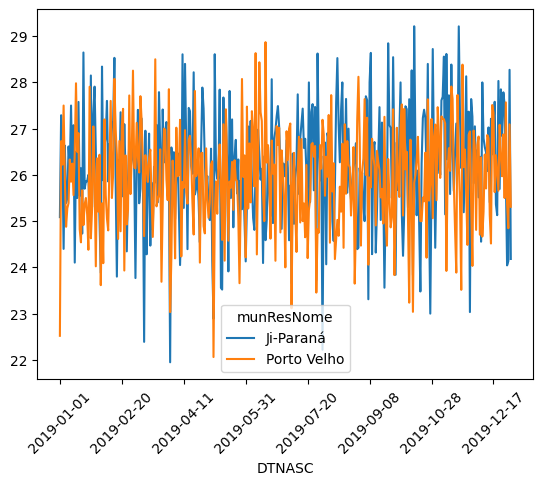

In [56]:
# Agrupando por "região intermediária" e calculando a média da idade em cada grupo
sinasc_1.groupby(['DTNASC', intermediarias])['IDADEMAE'].mean().unstack().plot()
plt.xticks(rotation=45)

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [57]:
IDH = {
    "Alta Floresta D'Oeste" : 'IDH-médio', 
    'Alto Alegre dos Parecis': 'IDH-baixo',
    'Novo Horizonte do Oeste': 'IDH-médio', 
    'Rolim de Moura': 'IDH-alto', 
    "São Felipe D'Oeste": 'IDH-médio',
    'Ariquemes': 'IDH-alto', 
    'Cujubim': 'IDH-médio', 
    'Alto Paraíso': 'IDH-médio', 
    'Monte Negro': 'IDH-médio', 
    'Jaru': 'IDH-médio',
    'Rio Crespo': 'IDH-médio', 
    'Porto Velho': 'IDH-alto', 
    'Cacaulândia': 'IDH-médio', 
    'Itapuã do Oeste': 'IDH-médio',
    'Ji-Paraná': 'IDH-alto', 
    'Buritis': 'IDH-médio', 
    'Vilhena':'IDH-alto', 
    'Vale do Anari':'IDH-baixo',
    'Candeias do Jamari':'IDH-médio', 
    'Costa Marques':'IDH-médio', 
    'Campo Novo de Rondônia':'IDH-baixo',
    "Machadinho D'Oeste": 'IDH-baixo', 
    'Colorado do Oeste': 'IDH-médio', 
    'Nova Mamoré': 'IDH-baixo', 
    'Urupá': 'IDH-médio',
    'Ouro Preto do Oeste': 'IDH-médio', 
    'Corumbiara':'IDH-médio', 
    'São Miguel do Guaporé':'IDH-médio',
    'Governador Jorge Teixeira': 'IDH-baixo', 
    "Santa Luzia D'Oeste":'IDH-médio',
    'Pimenta Bueno': 'IDH-alto', 
    'Mirante da Serra':'IDH-médio', 
    'Cerejeiras':'IDH-médio',
    'Presidente Médici':'IDH-médio',
    'Cacoal': 'IDH-alto',
    'Parecis':'IDH-médio', 
    "Espigão D'Oeste":'IDH-médio',
    'São Francisco do Guaporé':'IDH-médio', 
    'Ministro Andreazza':'IDH-médio',
    "Nova Brasilândia D'Oeste":'IDH-médio', 
    "Alvorada D'Oeste":'IDH-médio',
    'Primavera de Rondônia':'IDH-médio', 
    'Seringueiras':'IDH-baixo',
    'Castanheiras':'IDH-médio', 
    'Chupinguaia':'IDH-médio', 
    'Guajará-Mirim':'IDH-médio',
    'Theobroma':'IDH-baixo',
    'Nova União':'IDH-baixo', 
    'Teixeirópolis':'IDH-médio', 
    'Vale do Paraíso':'IDH-médio',
    'Pimenteiras do Oeste':'IDH-médio',
    'Cabixi':'IDH-médio'   
}

In [58]:
idh = sinasc.set_index('munResNome')
idh.groupby(IDH)[['IDADEMAE', 'IDADEPAI']].agg(['mean','median', 'std'])

IDADEMAE                    IDADEPAI                 
                 mean median       std       mean median       std
munResNome                                                        
IDH-alto    26.280332   26.0  6.415374  31.074091   30.0  7.773149
IDH-baixo   25.326944   25.0  6.194908  30.617450   30.0  7.417345
IDH-médio   25.884855   25.0  6.353274  31.207092   30.0  7.824859

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [59]:
IFDM = {
    "Espigão d'Oeste":'des_regular',
    'Seringueiras':'des_regular',
    "Alvorada d'Oeste":'des_regular',
    'Itapuã do Oeste':'des_regular',
    'Cabixi':'des_regular',
    'Novo Horizonte do Oeste':'des_regular',
    "Nova Brasilândia d'Oeste":'des_regular',
    'Vale do Paraíso':'des_regular',
    'Corumbiara':'des_regular',
    'Alto Paraíso':'des_regular',
    'Cacaulândia':'des_regular',
    'Vale do Anari':'des_regular',
    'Ministro Andreazza':'des_regular',
    'Costa Marques':'des_regular',
    'Nova União':'des_regular',
    'Guajará-Mirim':'des_regular',
    'Mirante da Serra':'des_regular',
    'Parecis':'des_regular',
    'Castanheiras':'des_regular',
    'Theobroma':'des_regular',
    "Machadinho d'Oeste":'des_regular',
    'Campo Novo de Rondônia':'des_regular',
    'Nova Mamoré':'des_regular',
    'Cujubim':'des_regular',
    'Alto Alegre dos Parecis':'des_regular',
    'Governador Jorge Teixeira': 'des_regular',
    "Ariquemes": 'des_moderado',
    "Vilhena": 'des_moderado',
    "Pimenta Bueno": 'des_moderado',
    "Porto Velho": 'des_moderado',
    "Ji-Paraná": 'des_moderado',
    "Cacoal": 'des_moderado',
    "Santa Luzia d'Oeste": 'des_moderado',
    "Rolim de Moura": 'des_moderado',
    "Chupinguaia": 'des_moderado',
    "São Miguel do Guaporé": 'des_moderado',
    "Pimenteiras do Oeste": 'des_moderado',
    "Teixeirópolis": 'des_moderado',
    "Colorado do Oeste": 'des_moderado',
    "Jaru": 'des_moderado',
    "Rio Crespo": 'des_moderado',
    "Primavera de Rondônia": 'des_moderado',
    "Alta Floresta d'Oeste": 'des_moderado',
    "Ouro Preto do Oeste": 'des_moderado',
    "São Francisco do Guaporé": 'des_moderado',
    "Candeias do Jamari": 'des_moderado',
    "Buritis": 'des_moderado',
    "São Felipe d'Oeste": 'des_moderado',
    "Presidente Médici": 'des_moderado',
    "Cerejeiras": 'des_moderado',
    "Monte Negro": 'des_moderado',
    "Urupá": 'des_moderado',
    
}

In [60]:
sinasc.set_index('munResNome')['IDADEMAE'].groupby(IFDM).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
des_moderado,561938,26.226921,12,53,26.0,6.388564,40.813756
des_regular,93135,25.412005,11,52,25.0,6.376854,40.664266


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [61]:
PIB = {
    "Porto Velho": "Acima de 1 bilhão",
    "Ji-Paraná": "Acima de 1 bilhão",
    "Vilhena": "Acima de 1 bilhão",
    "Ariquemes": "Acima de 1 bilhão",
    "Cacoal": "Acima de 1 bilhão",
    "Jaru": "Acima de 1 bilhão",
    "Rolim de Moura": "Acima de 1 bilhão",
    "Pimenta Bueno": "Acima de 1 bilhão",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Buritis": "Acima de 500 Milhões",
    "Machadinho do Oeste": "Acima de 500 Milhões",
    "Espigão d'Oeste": "Acima de 500 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Alta Floresta do Oeste": "Acima de 300 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Nova Brasilândia do Oeste": "Acima de 300 Milhões",
    "Alto Paraíso": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Alvorada do Oeste": "Acima de 200 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Seringueiras": "Acima de 100 Milhões",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Governador Jorge Teixeira": "Acima de 100 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Santa Luzia do Oeste": "Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Cabixi": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    "Nova União": "Até 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "São Felipe do Oeste": "Até 100 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Primavera de Rondônia": "Até 100 Milhões"
}

In [62]:
sinasc.set_index('munResNome')['IDADEMAE'].groupby(PIB).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


,sum,mean,min,max,median,std,var
munResNome,,,,,,,
Acima de 1 bilhão,465846,26.265562,12,47,26.0,6.403777,41.008357
Acima de 100 Milhões,47508,25.638424,12,52,25.0,6.324801,40.003102
Acima de 200 Milhões,13051,25.146435,13,41,25.0,5.905771,34.878129
Acima de 300 Milhões,32184,25.706070,11,47,25.0,6.344987,40.258860
Acima de 500 Milhões,86486,25.785927,13,53,25.0,6.479551,41.984580
Até 100 Milhões,9998,26.519894,14,41,26.0,5.877767,34.548140


In [63]:
sinasc.set_index('munResNome')['IDADEPAI'].groupby(PIB).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
Acima de 1 bilhão,144654.0,31.108387,15.0,70.0,30.0,7.767477,60.333700
Acima de 100 Milhões,18253.0,31.744348,17.0,73.0,31.0,8.008643,64.138361
Acima de 200 Milhões,5796.0,30.187500,16.0,55.0,29.0,7.659388,58.666230
Acima de 300 Milhões,8691.0,30.819149,16.0,64.0,30.0,7.858123,61.750095
Acima de 500 Milhões,20869.0,31.381955,17.0,60.0,31.0,7.583172,57.504493
Até 100 Milhões,7021.0,31.626126,17.0,67.0,30.0,7.665510,58.760038


## Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

#### 1 - As mães de primeira viagem estão na faixa etária de 25 e 26 anos
#### 2 - Os pais geralmente são mais velhos que as mães onde possuem uma diferença de 5 a 6 anos